# EBAC - Regressão II - regressão múltipla

## Tarefa I

#### Previsão de renda II

Vamos continuar trabalhando com a base 'previsao_de_renda.csv', que é a base do seu próximo projeto. Vamos usar os recursos que vimos até aqui nesta base.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

In [98]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import graphviz

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

In [104]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [4]:
df = pd.read_csv('previsao_de_renda.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
dtypes:

1. Separe a base em treinamento e teste (25% para teste, 75% para treinamento).
2. Rode uma regularização *ridge* com alpha = [0, 0.001, 0.005, 0.01, 0.05, 0.1] e avalie o $R^2$ na base de testes. Qual o melhor modelo?
3. Faça o mesmo que no passo 2, com uma regressão *LASSO*. Qual método chega a um melhor resultado?
4. Rode um modelo *stepwise*. Avalie o $R^2$ na vase de testes. Qual o melhor resultado?
5. Compare os parâmetros e avalie eventuais diferenças. Qual modelo você acha o melhor de todos?
6. Partindo dos modelos que você ajustou, tente melhorar o $R^2$ na base de testes. Use a criatividade, veja se consegue inserir alguma transformação ou combinação de variáveis.
7. Ajuste uma árvore de regressão e veja se consegue um $R^2$ melhor com ela.

In [7]:
X = df.drop(['Unnamed: 0', 'data_ref', 'id_cliente'], axis=1)
X

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97
...,...,...,...,...,...,...,...,...,...,...,...,...
14995,F,False,True,0,Empresário,Secundário,Solteiro,Casa,48,13.887671,1.0,7990.58
14996,F,False,True,0,Pensionista,Superior completo,Solteiro,Casa,57,NaN,1.0,10093.45
14997,F,True,True,0,Assalariado,Superior completo,Casado,Casa,45,7.832877,2.0,604.82
14998,M,True,False,0,Empresário,Superior completo,Casado,Casa,36,4.298630,2.0,3352.27


In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   15000 non-null  object 
 1   posse_de_veiculo       15000 non-null  bool   
 2   posse_de_imovel        15000 non-null  bool   
 3   qtd_filhos             15000 non-null  int64  
 4   tipo_renda             15000 non-null  object 
 5   educacao               15000 non-null  object 
 6   estado_civil           15000 non-null  object 
 7   tipo_residencia        15000 non-null  object 
 8   idade                  15000 non-null  int64  
 9   tempo_emprego          12427 non-null  float64
 10  qt_pessoas_residencia  15000 non-null  float64
 11  renda                  15000 non-null  float64
dtypes: bool(2), float64(3), int64(2), object(5)
memory usage: 1.2+ MB


In [42]:
from sklearn.model_selection import train_test_split

# Carregar a base de dados
df = pd.read_csv('previsao_de_renda.csv')

# Separar as variáveis explicativas (X) da variável alvo (y)
X = df.drop(columns=['data_ref', 'id_cliente'])  # Exclui a coluna de renda e outras irrelevantes para a previsão
y = df['renda']  # Alvo é a renda

# Dividir a base em treinamento (75%) e teste (25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(f"Tamanho do conjunto de treinamento: {X_train.shape[0]}")
print(f"Tamanho do conjunto de teste: {X_test.shape[0]}")


Tamanho do conjunto de treinamento: 11250
Tamanho do conjunto de teste: 3750


In [50]:
from sklearn.impute import SimpleImputer

# Converter variáveis categóricas em variáveis dummies (one-hot encoding)
X = pd.get_dummies(df.drop(columns=['renda', 'data_ref', 'id_cliente']), drop_first=True)

# Criar o imputador para preencher valores ausentes com a média
imputer = SimpleImputer(strategy='mean')

# Aplicar o imputador à matriz X
X_imputed = imputer.fit_transform(X)

# Dividir a base em treinamento (75%) e teste (25%)
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.25, random_state=42)

# Lista de valores alpha
alphas = [0, 0.001, 0.005, 0.01, 0.05, 0.1]

# Dicionário para armazenar os resultados
results = {}

# Iterar por cada valor de alpha
for alpha in alphas:
    # Definir o modelo Ridge com o valor de alpha atual
    model = Ridge(alpha=alpha)
    
    # Treinar o modelo na base de treinamento
    model.fit(X_train, y_train)
    
    # Fazer previsões na base de teste
    y_pred = model.predict(X_test)
    
    # Calcular o erro quadrático médio (MSE)
    mse = mean_squared_error(y_test, y_pred)
    
    # Armazenar o MSE no dicionário de resultados
    results[alpha] = mse

# Exibir os resultados
for alpha, mse in results.items():
    print(f"Alpha: {alpha} - MSE: {mse}")

# Identificar o alpha com o menor MSE
best_alpha = min(results, key=results.get)
print(f"\nMelhor modelo tem alpha = {best_alpha} com MSE = {results[best_alpha]}")


Alpha: 0 - MSE: 49232561.52324755
Alpha: 0.001 - MSE: 49232560.92138405
Alpha: 0.005 - MSE: 49232558.51639308
Alpha: 0.01 - MSE: 49232555.515684485
Alpha: 0.05 - MSE: 49232531.72894223
Alpha: 0.1 - MSE: 49232502.53201285

Melhor modelo tem alpha = 0.1 com MSE = 49232502.53201285


In [52]:
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score

# Converter variáveis categóricas em variáveis dummies (one-hot encoding)
X = pd.get_dummies(df.drop(columns=['renda', 'data_ref', 'id_cliente']), drop_first=True)

# Criar o imputador para preencher valores ausentes com a média
imputer = SimpleImputer(strategy='mean')

# Aplicar o imputador à matriz X
X_imputed = imputer.fit_transform(X)

# Dividir a base em treinamento (75%) e teste (25%)
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.25, random_state=42)

# Lista de valores alpha
alphas = [0, 0.001, 0.005, 0.01, 0.05, 0.1]

# Dicionário para armazenar os resultados
results_r2 = {}

# Iterar por cada valor de alpha
for alpha in alphas:
    # Definir o modelo Ridge com o valor de alpha atual
    model = Ridge(alpha=alpha)
    
    # Treinar o modelo na base de treinamento
    model.fit(X_train, y_train)
    
    # Fazer previsões na base de teste
    y_pred = model.predict(X_test)
    
    # Calcular o R²
    r2 = r2_score(y_test, y_pred)
    
    # Armazenar o R² no dicionário de resultados
    results_r2[alpha] = r2

# Exibir os resultados
for alpha, r2 in results_r2.items():
    print(f"Alpha: {alpha} - R²: {r2}")

# Identificar o alpha com o maior R²
best_alpha_r2 = max(results_r2, key=results_r2.get)
print(f"\nMelhor modelo tem alpha = {best_alpha_r2} com R² = {results_r2[best_alpha_r2]}")


Alpha: 0 - R²: 0.2690983898498722
Alpha: 0.001 - R²: 0.2690983987850767
Alpha: 0.005 - R²: 0.26909843448932835
Alpha: 0.01 - R²: 0.26909847903754347
Alpha: 0.05 - R²: 0.26909883217310426
Alpha: 0.1 - R²: 0.26909926562775366

Melhor modelo tem alpha = 0.1 com R² = 0.26909926562775366


In [54]:
from sklearn.linear_model import Lasso

# Lista de valores alpha para a regressão LASSO
alphas = [0.001, 0.005, 0.01, 0.05, 0.1]

# Dicionário para armazenar os resultados do LASSO
results_lasso_r2 = {}

# Iterar por cada valor de alpha
for alpha in alphas:
    # Definir o modelo LASSO com o valor de alpha atual
    model = Lasso(alpha=alpha)
    
    # Treinar o modelo na base de treinamento
    model.fit(X_train, y_train)
    
    # Fazer previsões na base de teste
    y_pred = model.predict(X_test)
    
    # Calcular o R²
    r2 = r2_score(y_test, y_pred)
    
    # Armazenar o R² no dicionário de resultados
    results_lasso_r2[alpha] = r2

# Exibir os resultados
for alpha, r2 in results_lasso_r2.items():
    print(f"Alpha: {alpha} - R²: {r2}")

# Identificar o alpha com o maior R²
best_alpha_lasso_r2 = max(results_lasso_r2, key=results_lasso_r2.get)
print(f"\nMelhor modelo LASSO tem alpha = {best_alpha_lasso_r2} com R² = {results_lasso_r2[best_alpha_lasso_r2]}")


C:\Users\morid\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.805e+11, tolerance: 7.723e+07
  model = cd_fast.enet_coordinate_descent(
C:\Users\morid\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.604e+11, tolerance: 7.723e+07
  model = cd_fast.enet_coordinate_descent(
C:\Users\morid\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.376e+11, toleranc

Alpha: 0.001 - R²: 0.26909852617158125
Alpha: 0.005 - R²: 0.26909889046649516
Alpha: 0.01 - R²: 0.26909933809420994
Alpha: 0.05 - R²: 0.2691026094788177
Alpha: 0.1 - R²: 0.2691059246167862

Melhor modelo LASSO tem alpha = 0.1 com R² = 0.2691059246167862


C:\Users\morid\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.075e+10, tolerance: 7.723e+07
  model = cd_fast.enet_coordinate_descent(


In [15]:
# Comparar o melhor modelo Ridge com o melhor modelo LASSO
if results_r2[best_alpha_r2] > results_lasso_r2[best_alpha_lasso_r2]:
    print(f"Ridge tem o melhor resultado com alpha = {best_alpha_r2} e R² = {results_r2[best_alpha_r2]}")
else:
    print(f"LASSO tem o melhor resultado com alpha = {best_alpha_lasso_r2} e R² = {results_lasso_r2[best_alpha_lasso_r2]}")


LASSO tem o melhor resultado com alpha = 0.1 e R² = 0.2691059246167862


In [ ]:
# Certificando-se de que X_train e y_train têm índices alinhados
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

# Certificando-se de que X_test também tenha o mesmo formato de X_train
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Aplicando o Stepwise
selected_features = stepwise_selection(X_train, y_train)

# Treinar o modelo final com as variáveis selecionadas
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Ajustando o modelo de Regressão Linear com as variáveis selecionadas
model = sm.OLS(y_train, sm.add_constant(X_train_selected)).fit()

# Fazendo previsões e avaliando o R² no conjunto de testes
y_pred_stepwise = model.predict(sm.add_constant(X_test_selected))
r2_stepwise = r2_score(y_test, y_pred_stepwise)

print(f"\nR² para o modelo Stepwise: {r2_stepwise}")



O modelo LASSO é o melhor entre os dois, pois possui um R2 levemente superior

In [21]:
df = pd.read_csv('previsao_de_renda.csv')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
dtypes:

In [56]:
X = df.drop(['Unnamed: 0', 'data_ref', 'id_cliente'], axis=1)
X

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97
...,...,...,...,...,...,...,...,...,...,...,...,...
14995,F,False,True,0,Empresário,Secundário,Solteiro,Casa,48,13.887671,1.0,7990.58
14996,F,False,True,0,Pensionista,Superior completo,Solteiro,Casa,57,NaN,1.0,10093.45
14997,F,True,True,0,Assalariado,Superior completo,Casado,Casa,45,7.832877,2.0,604.82
14998,M,True,False,0,Empresário,Superior completo,Casado,Casa,36,4.298630,2.0,3352.27


In [58]:
X_train, X_test = train_test_split(X, train_size=0.75, random_state=100)

In [60]:
X1 = patsy.dmatrices('''np.log(renda) ~ C(sexo) 
                    + C(posse_de_veiculo) 
                    + C(posse_de_imovel)
                    + qtd_filhos 
                    + C(tipo_renda) 
                    + C(educacao, Treatment(2)) 
                    + C(estado_civil) 
                    + C(tipo_residencia, Treatment(1)) 
                    + idade
                    + tempo_emprego
                    + qt_pessoas_residencia 
                    + 1''', X_test)

In [66]:
X_train_a = X_train.dropna()

In [68]:
X_train_b = pd.get_dummies(X_train_a, columns=['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia'], drop_first=True)
X_train_b.head()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,sexo_M,posse_de_veiculo_True,posse_de_imovel_True,tipo_renda_Bolsista,tipo_renda_Empresário,...,educacao_Superior incompleto,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Casa,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental
1614,0,34,1.797260,2.0,3160.87,False,True,True,False,True,...,False,False,False,False,False,True,False,False,False,False
9327,1,34,9.101370,3.0,6480.13,True,True,True,False,True,...,False,False,False,False,False,True,False,False,False,False
11914,1,37,1.753425,3.0,5847.17,True,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
14579,1,44,7.473973,3.0,10415.23,True,True,True,False,False,...,False,False,False,False,False,True,False,False,False,False
10292,1,34,16.583562,3.0,10300.75,False,True,True,False,False,...,False,False,False,False,False,True,False,False,False,False


In [70]:
X_train_c = X_train_b.drop(['renda'], axis=1)
y_train_a = X_train_b['renda']

In [72]:
X_train_b.rename(columns = {'educacao_Superior completo':'educacao_Superior_completo'}, inplace=True)

In [74]:
modelo_m = smf.ols('''np.log(renda) ~  tempo_emprego + 
                                        sexo_M + 
                                        tipo_renda_Empresário + 
                                        idade + 
                                        educacao_Superior_completo + 
                                        qt_pessoas_residencia''', data = X_train_b).fit()
modelo_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     850.1
Date:                Tue, 01 Oct 2024   Prob (F-statistic):               0.00
Time:                        00:22:00   Log-Likelihood:                -10209.
No. Observations:                9327   AIC:                         2.043e+04
Df Residuals:                    9320   BIC:                         2.048e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                              7.1511      0.045    157.244      0.000       7.062       7.240
sexo_M[T.True]                         0.7922      0.016     49.900      0.000       0.761       0.823
tipo_renda_Empresário[T.True]          0.1369      0.017      8.131      0.000       0.104       0.170
educacao_Superior_completo[T.True]     0.1107      0.016      7.122      0.000       0.080       0.141
tempo_emprego                          0.0628      0.001     52.346      0.000       0.060       0.065
idade                                  0.0049      0.001      5.551      0.000       0.003       0.007
qt_pessoas_residencia                  0.0279      0.008      3.389      0.001       0.012       0.044
==============================================================================
Omnibus:                        0.010   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.995   Jarque-Bera (JB):                0.018
Skew:                           0.001   Prob(JB):                        0.991
Kurtosis:                       2.994   Cond. No.                         262.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

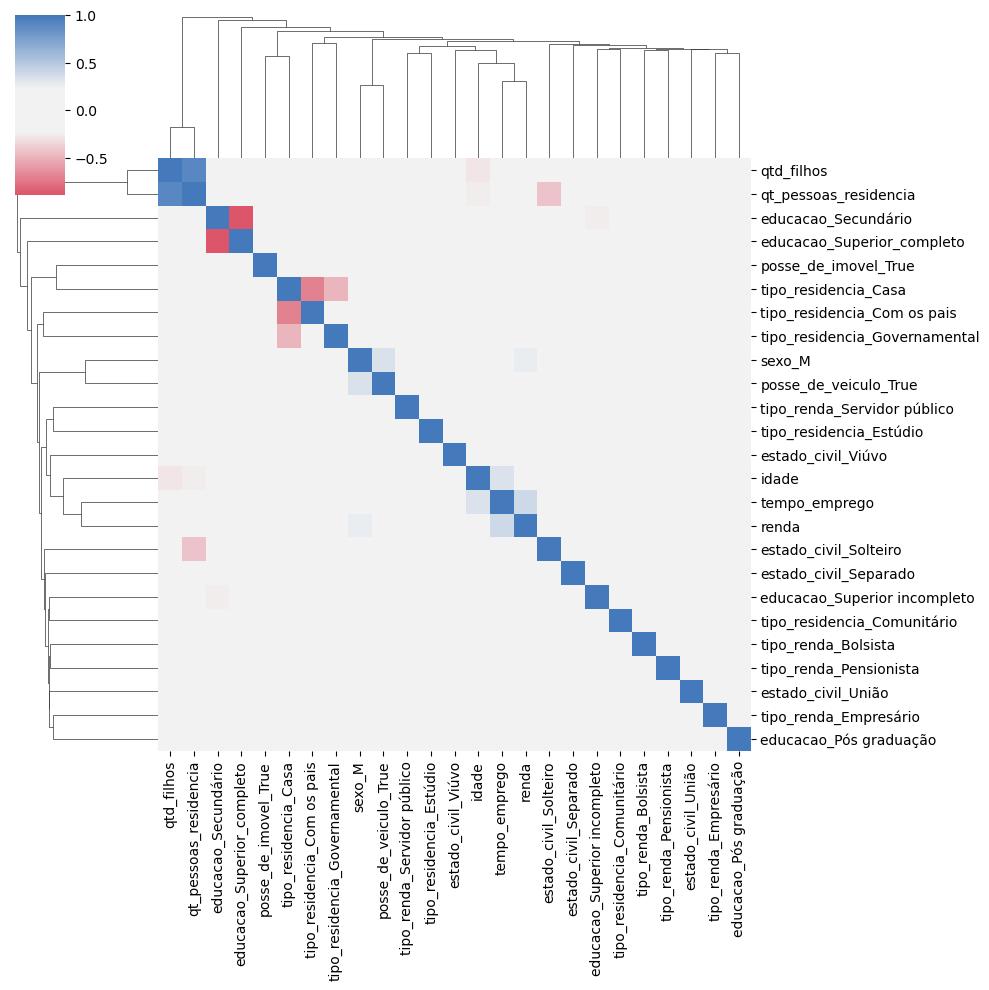

In [76]:

cmap = sns.diverging_palette(h_neg=7, h_pos=250, as_cmap=True, sep = 60, center = 'light')

sns.clustermap(X_train_b.corr(), figsize=(10, 10), center = 0, cmap=cmap)

In [78]:
regr1 = DecisionTreeRegressor(max_depth=8)
regr2 = DecisionTreeRegressor(max_depth=2)

regr1.fit(X_train_c, y_train_a)
regr2.fit(X_train_c, y_train_a)

DecisionTreeRegressor(max_depth=2)

In [82]:

train1 = regr1.predict(X_train_c)
train2 = regr2.predict(X_train_c)
print('Para base de treinamento:')
print('O mse com profundidade = 8, MSE=', mean_squared_error(y_train_a,train1))
print('O mse com profundidade = 2, MSE=', mean_squared_error(y_train_a,train2))

Para base de treinamento:
O mse com profundidade = 8, MSE= 27828883.890118647
O mse com profundidade = 2, MSE= 57912531.13981869


In [106]:
data = tree.export_graphviz(regr1, out_file=None, 
                                feature_names=X_train_c.columns,
                                filled=True)

graph = graphviz.Source(data, format="png") 
graph


ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [108]:
data = tree.export_graphviz(regr2, out_file=None, 
                                feature_names=X_train_c.columns,
                                filled=True)

graph = graphviz.Source(data, format="png") 
graph

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [110]:
#egr1.fit(X_train_c, y_train_a)
#egr2.fit(X_train_c, y_train_a)
path = regr1.cost_complexity_pruning_path(X_train_c, y_train_a)

Text(0, 0.5, 'Impureza total das folhas')

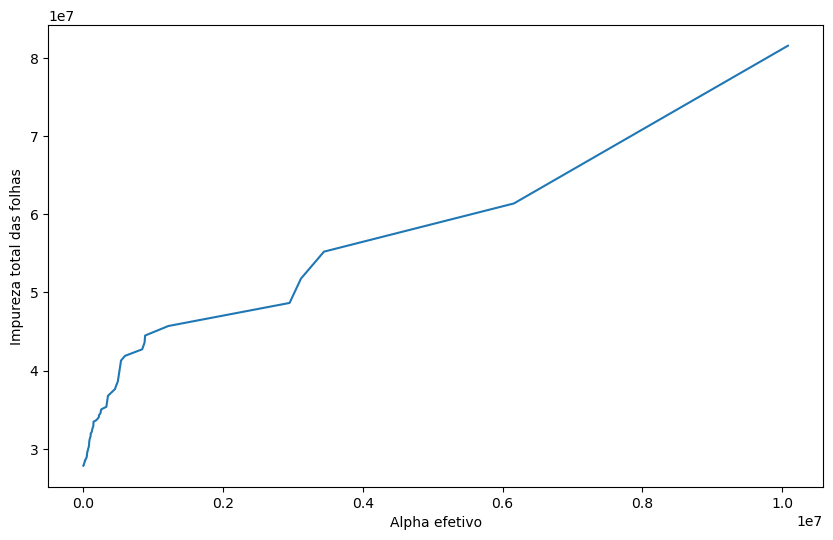

In [112]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities)
plt.xlabel("Alpha efetivo")
plt.ylabel("Impureza total das folhas")

In [114]:
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train_c, y_train_a)
    clfs.append(clf)

Text(0, 0.5, 'Profundidade da árvore')

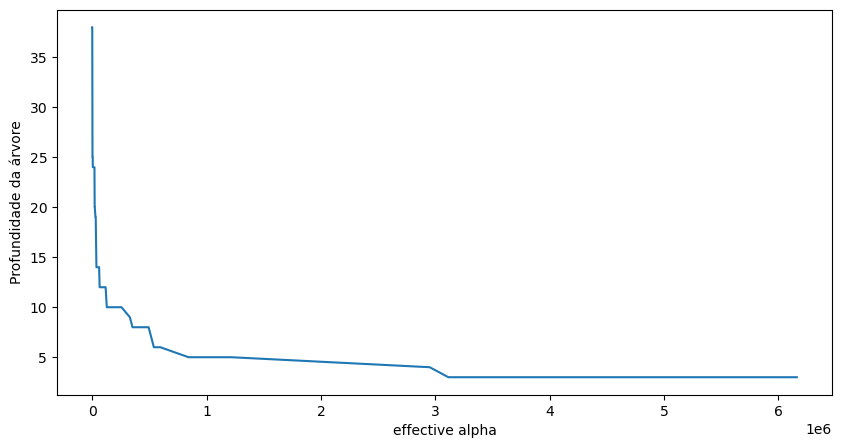

In [115]:
tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  5))
plt.plot(ccp_alphas[:-1], tree_depths[:-1])
plt.xlabel("effective alpha")
plt.ylabel("Profundidade da árvore")

In [116]:
train_scores = [mean_squared_error(y_train_a, clf.predict(X_train_c)) for clf in clfs]

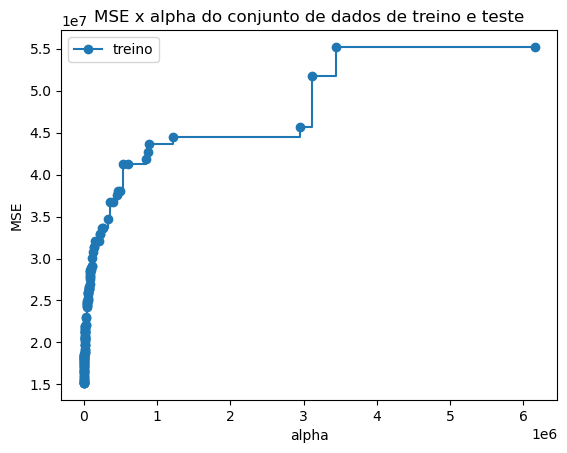

In [117]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("MSE")
ax.set_title("MSE x alpha do conjunto de dados de treino e teste")
ax.plot(ccp_alphas[:-1], train_scores[:-1], marker='o', label="treino",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [118]:
arvore_final = DecisionTreeRegressor (random_state=0, ccp_alpha=.5)
arvore_final.fit(X_train_c, y_train_a)

print(f'Profundidade: {arvore_final.tree_.max_depth}')
print(f'MSE na base de testes: {mean_squared_error(y_train_a , arvore_final.predict(X_train_c)):.2f}')

Profundidade: 38
MSE na base de testes: 15184218.76


In [119]:
ata = tree.export_graphviz(regr1, out_file=None, 
                                feature_names=X_train_c.columns,
                                filled=True)

graph = graphviz.Source(data, format="png") 
graph

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH